In [1]:
import pandas as pd
import numpy as np

Suppose that in this case you wanted to compare three different studying programs, A, B, and C to determine whether they have an effect on exam score

In [2]:
index_students = [i + 1  for i in range(12)]

students_raw = {
    'Student' : index_students ,
    'Study_program' : ['A','A','A','A','B','B','B','B','C','C','C','C'],
    'Exam_score': [88,79,86,90,94,84,87,89,85,76,81,78]
}

students_df = pd.DataFrame(students_raw)
students_df.head(12)

,Student,Study_program,Exam_score
0,1,A,88
1,2,A,79
2,3,A,86
3,4,A,90
4,5,B,94
5,6,B,84
6,7,B,87
7,8,B,89
8,9,C,85
9,10,C,76


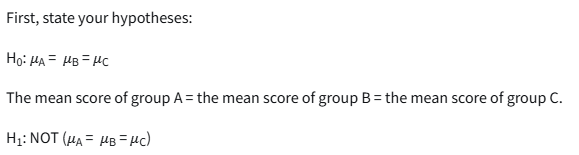

### ANOVA Step 1. 
Caculate the group means and the grand mean

In [3]:
# first get the grand mean
grand_mean = students_df['Exam_score'].mean().round(4)
grand_mean

np.float64(84.75)

In [4]:
# Now get the mean for each study program
mean_by_prog = students_df.groupby('Study_program').agg({'Exam_score':['mean','count']})
mean_by_prog 

Exam_score      
                    mean count
Study_program                 
A                  85.75     4
B                  88.50     4
C                  80.00     4

In [5]:
mean_by_prog.shape
mean_by_prog.iloc[2]['Exam_score']['mean']

np.float64(80.0)

### Step 2
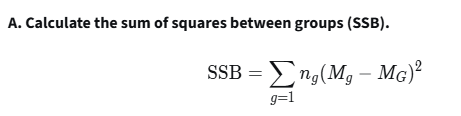

In [6]:
SSB = 0
for i in range(mean_by_prog.shape[0]): 
    SSB += mean_by_prog.iloc[i]['Exam_score']['count'] * ((mean_by_prog.iloc[i]['Exam_score']['mean']-grand_mean)**2)

SSB

np.float64(150.5)

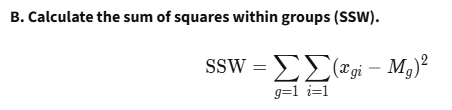

In [30]:
# Define the function for the summatory

def sum_of_squares(df, means_df):
    ''' 
    The pourpose of this function is to 
    get the group for each student, calculate the
    squared difference and they do the sum  
    '''
    SSW = 0
    
    mean_a = means_df.loc['A']['Exam_score']['mean']
    mean_b = means_df.loc['B']['Exam_score']['mean']
    mean_c = means_df.loc['C']['Exam_score']['mean']
    
    for i in df.index:
        if df.iloc[i]['Study_program'] == 'A':
            mean = mean_a
        elif df.iloc[i]['Study_program'] == 'B':
            mean = mean_b
        elif df.iloc[i]['Study_program'] == 'C':
            mean = mean_c
        
        SSW += (df.iloc[i]['Exam_score'] - mean)**2
    
    return SSW


SSW_students = sum_of_squares(students_df, mean_by_prog)



### Step 3: Calculate mean squares between groups and within groups. 

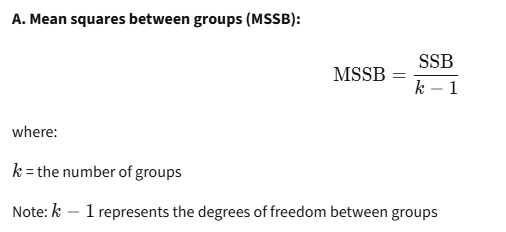

In [25]:
k = 3 # there are three study programs 'A' / 'B' / 'C'

MSSB = (SSB)/(k-1)
MSSB

np.float64(75.25)

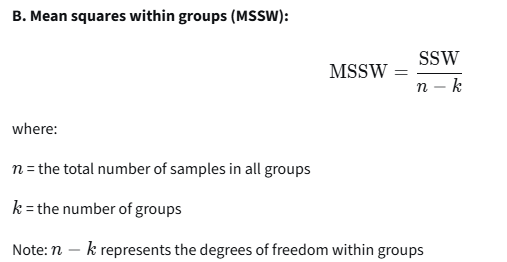

In [33]:
n = students_df.shape[0]
k = mean_by_prog.shape[0]

MSSW = round((SSW_students)/(n-k),4)
MSSW

np.float64(18.6389)

### Step 4: Compute the F-statistic

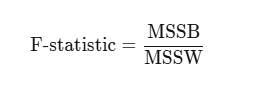

In [38]:
f_stat = round(MSSB/MSSW,2)
f_stat

np.float64(4.04)